In [1]:
import data as data_processing
import plot as plot_data
import filter as filter_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=data_processing.get_data("../data/data.xlsx")

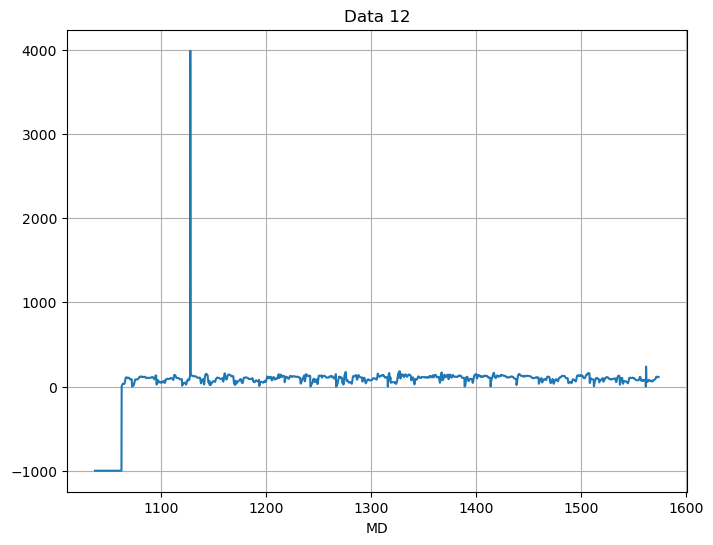

In [3]:
name='Data 12'
plot_data.plot(data[['MD',name]] ,scatter=False)

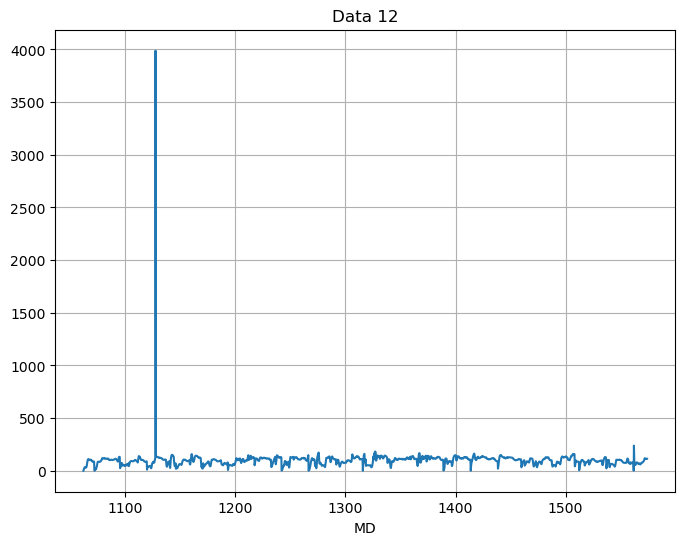

In [4]:


border=data_processing.get_index_start_end_work(data,name)
start_=border[0][0]
end_=border[0][1]

data_check=data_processing.get_data_by_border(data,start_,end_,name)

data_check=data_processing.get_data_with_frequency(data_check,1)
plot_data.plot(data_check,scatter=False)

In [16]:
data_check_filter=filter_data.moving_average_manual_mean(data_check,name,100)

In [18]:
def moving_average_manual_mean(data, column_name, radius):
    filtered_data = data[['MD', column_name]].copy()
    
    start = data[column_name].index[0]
    end = data[column_name].index[-1]
    
    for i in range(start, end):
        if i >= radius and i <= (end - radius):
            filtered_data[column_name][i] = sum(data[column_name][i - radius:i + radius + 1]) // (2 * radius + 1)
        elif i < radius:
            filtered_data[column_name][i] = sum(data[column_name][0:i + radius + 1]) // (i + radius + 1)
        else:
            filtered_data[column_name][i] = sum(data[column_name][i - radius:end]) // (end - i + radius + 1)
        
    return filtered_data


In [21]:
data_check_filter=filter_data.moving_average_py(data_check,name,100)

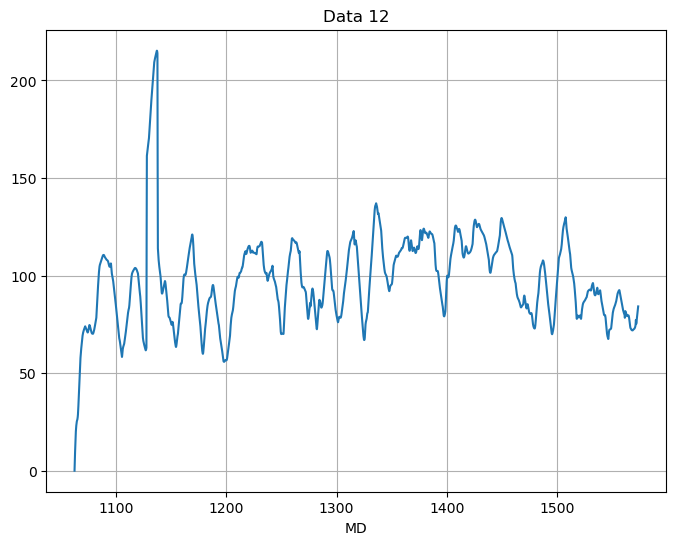

In [22]:
plot_data.plot(data_check_filter,scatter=False)

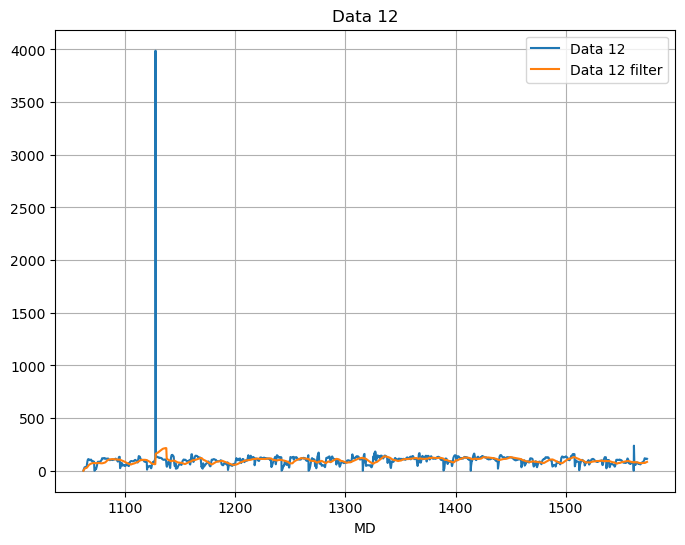

In [23]:
data_print=[(name,data_check),(name+' filter',data_check_filter)]

plot_data.plot_multiple(data_print,name)

In [8]:
data_normal=data_processing.get_data_analysis(data_check,data_check_filter)

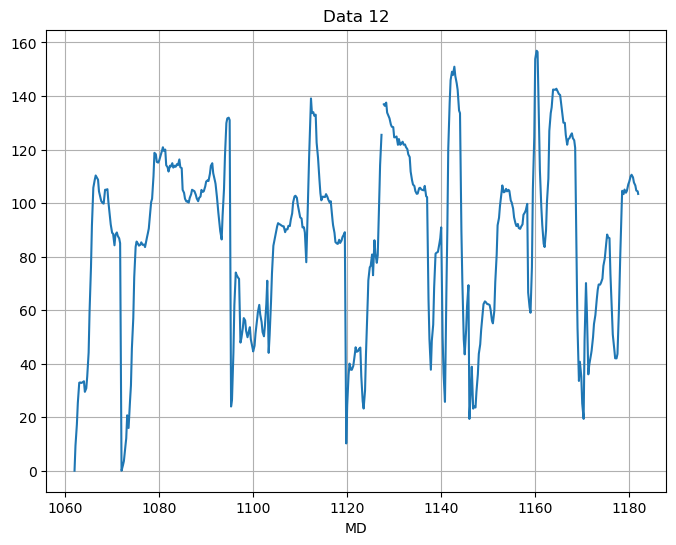

In [9]:
plot_data.plot(data_normal[:1200],scatter=False)

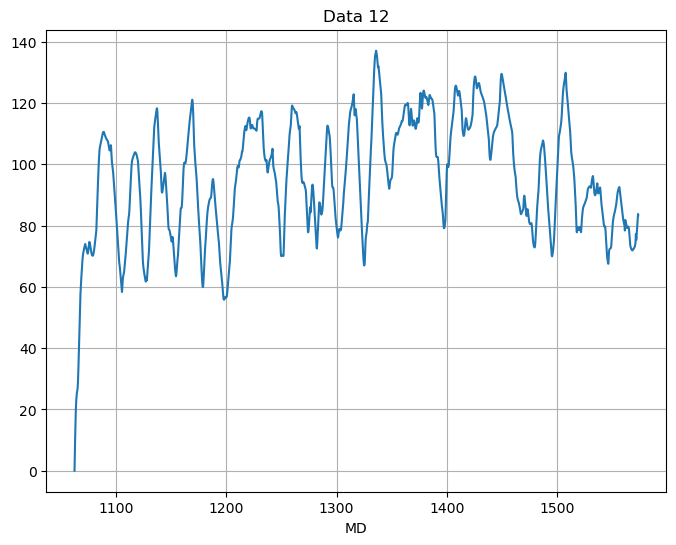

In [10]:
data_check_filter=filter_data.moving_average_py(data_normal,name,100)
plot_data.plot(data_check_filter,scatter=False)